In [8]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
import Tools as tl
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell

In [4]:
zro2 = read_vasp('Structure/POSCAR')

In [6]:
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


(<Axes:>, <Axes:>, <Axes:>)

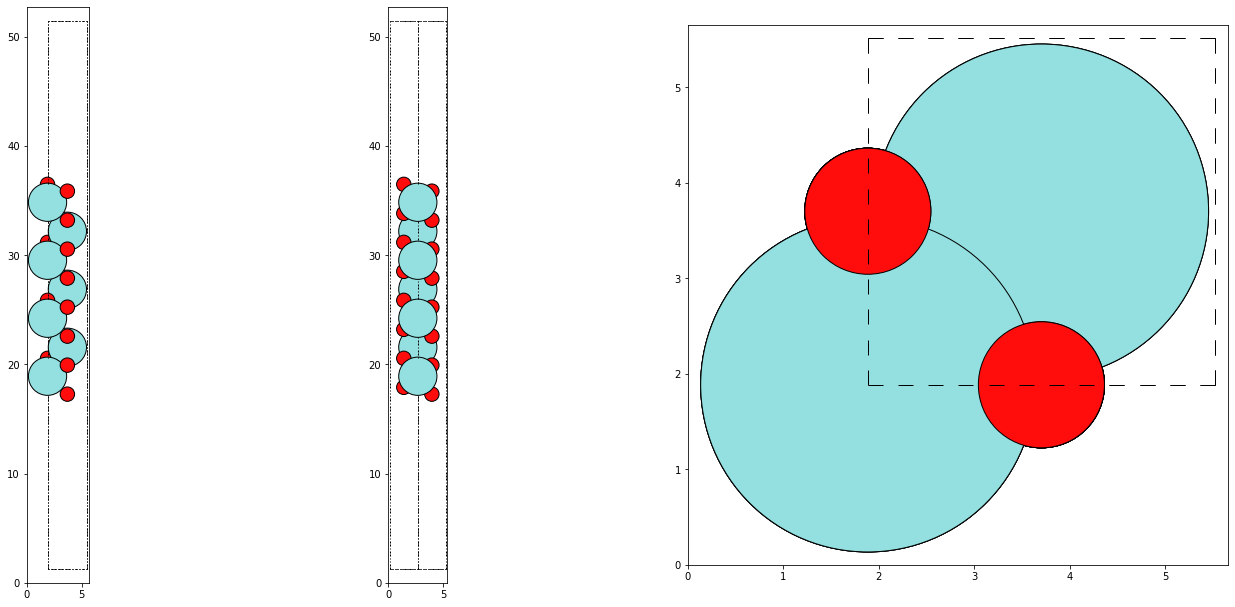

In [10]:
tl.plotviews(ZrO2001Oterm[0])

### · Creo Celda 2x2

In [66]:
ZrO2001Oterm_2x2 = [make_supercell(ZrO2001Oterm[i],[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for i in range(len(ZrO2001Oterm))]

(<Axes:>, <Axes:>, <Axes:>)

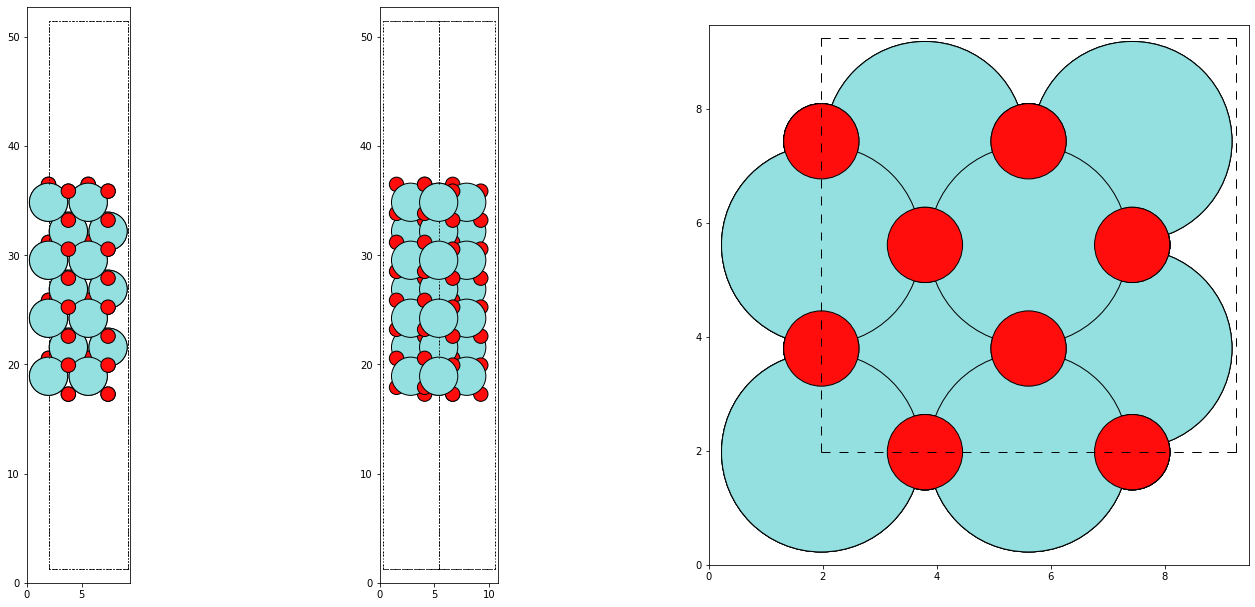

In [67]:
tl.plotviews(ZrO2001Oterm_2x2[0])

## Creo sitios 'hollow' - Puede hacerse un for cuando funcione bien

In [69]:
SitesZrO2 = []

tl.get_adsite(ZrO2001Oterm_2x2[0], site='hollow', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='hollow'))

tl.get_adsite(SitesZrO2[0], site='hollow', face='top')
SitesZrO2.append(tl.make_adstruc(SitesZrO2[0], 'RotBotTop', theface='top', thesite='hollow'))

tl.get_adsite(SitesZrO2[1], site='hollow', face='top')
SitesZrO2.append(tl.make_adstruc(SitesZrO2[1], 'RotBotTop', theface='top', thesite='hollow'))

<AxesSubplot:>

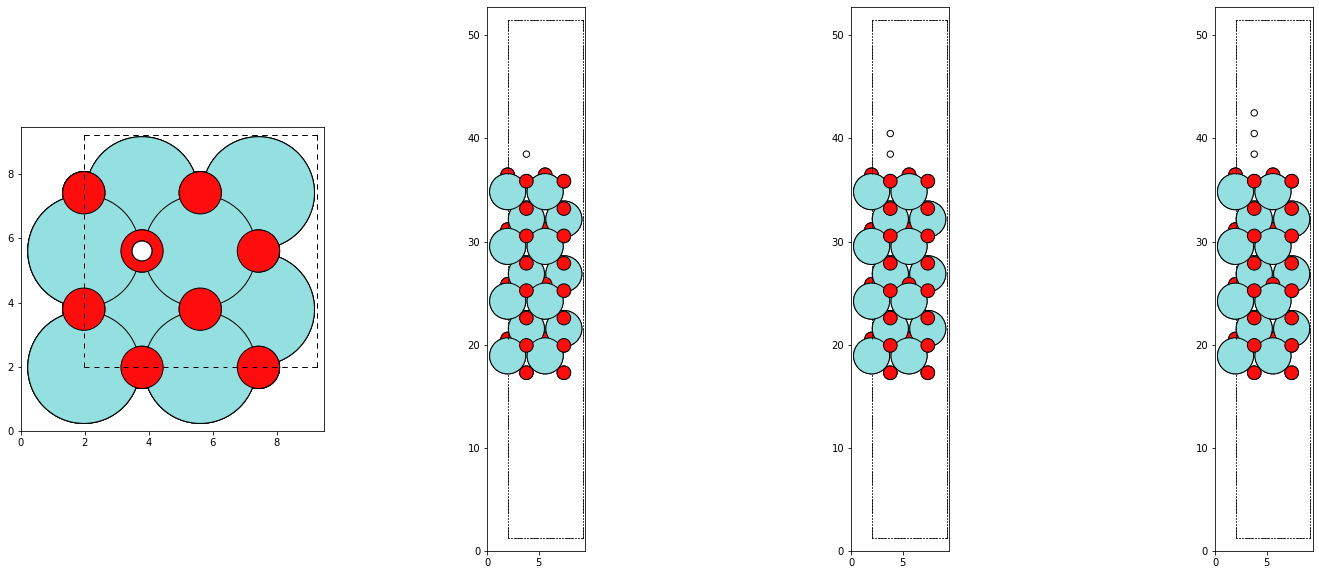

In [72]:
fig, ax = plt.subplots(1, 4)
plot_atoms(SitesZrO2[2], ax=ax[0])
plot_atoms(SitesZrO2[0], ax=ax[1], rotation="-90x")
plot_atoms(SitesZrO2[1], ax=ax[2], rotation="-90x")
plot_atoms(SitesZrO2[2], ax=ax[3], rotation="-90x")